In [134]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import scipy.stats as st

from sklearn.neighbors import LocalOutlierFactor

import matplotlib.pyplot as plt


***Clasificacion***

*Creacion de target*

Para esta tarea se debe crear una nueva variable tipo_precio que tendrá tres categorías:
alto, medio, bajo.

In [135]:
ds_clasificacion = pd.read_csv("properati_argentina_depurado.csv")

In [136]:
ds_clasificacion["precioxm2"] = (ds_clasificacion["property_price"]/ds_clasificacion["property_surface_total"]).round(2)
ds_clasificacion.drop(columns=["start_date", "end_date", "created_on", "property_title", "property_currency", "place_l2", "operation"], inplace=True)
ds_clasificacion.head(10)

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,precioxm2
0,-34.637319,-58.361124,Boca,Departamento,3.0,2.0,58.0,55.0,82900.0,1429.31
1,-34.628647,-58.361871,Boca,Departamento,4.0,3.0,70.0,70.0,99000.0,1414.29
2,-34.610027,-58.401934,Once,Departamento,4.0,2.0,134.0,104.0,146000.0,1089.55
3,-34.631621,-58.416825,Boedo,PH,4.0,2.0,107.0,73.0,250000.0,2336.45
4,-34.623886,-58.412746,Boedo,PH,2.0,1.0,61.0,46.0,100000.0,1639.34
5,-34.625588,-58.423056,Boedo,PH,4.0,2.0,104.0,54.0,185000.0,1778.85
6,-34.629398,-58.425852,Boedo,Departamento,2.0,1.0,62.0,44.0,100000.0,1612.90
7,-34.620748,-58.412004,Boedo,Departamento,3.0,2.0,59.0,55.0,185000.0,3135.59
8,-34.626595,-58.420019,Boedo,PH,4.0,3.0,111.0,101.0,110000.0,990.99
9,-34.630538,-58.419221,Boedo,Departamento,3.0,2.0,50.0,50.0,95000.0,1900.00


Igual Frecuencia

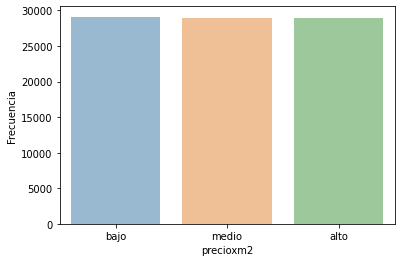

In [137]:
labels=["bajo","medio","alto"]

ds_clasificacion["precioxm2_igual_frec"]=pd.qcut(ds_clasificacion["precioxm2"],q=3, labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_precioxm2=ds_clasificacion.groupby(['precioxm2_igual_frec']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_precioxm2.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='precioxm2')
plt.show()

Por cuantiles

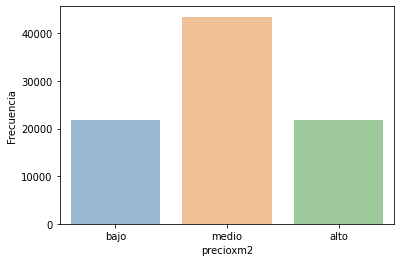

In [138]:
labels=["bajo","medio","alto"]
ds_clasificacion["precioxm2_q"]=pd.qcut(ds_clasificacion["precioxm2"],q=[0,0.25,0.75,1], labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_precioxm2=ds_clasificacion.groupby(['precioxm2_q']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_precioxm2.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='precioxm2')
plt.show()

Por viviendas

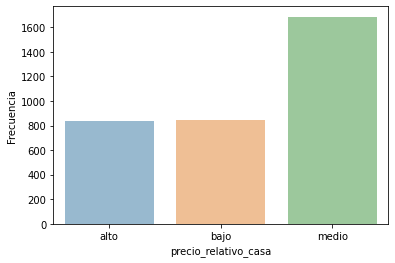

In [139]:
ds_clasificacion["precioxm2_relativo_q"] = np.nan
labels=["bajo","medio","alto"]
ds_clasificacion.loc[ds_clasificacion["property_type"] == "Casa", "precioxm2_relativo_q"]=pd.qcut(ds_clasificacion[ds_clasificacion["property_type"] == "Casa"]["precioxm2"],q=[0,0.25,0.75,1], labels=labels)
ds_clasificacion.loc[ds_clasificacion["property_type"] == "Departamento", "precioxm2_relativo_q"]=pd.qcut(ds_clasificacion[ds_clasificacion["property_type"] == "Departamento"]["precioxm2"],q=[0,0.25,0.75,1], labels=labels)
ds_clasificacion.loc[ds_clasificacion["property_type"] == "PH", "precioxm2_relativo_q"]=pd.qcut(ds_clasificacion[ds_clasificacion["property_type"] == "PH"]["precioxm2"],q=[0,0.25,0.75,1], labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_precioxm2=ds_clasificacion[ds_clasificacion["property_type"] == "Casa"].groupby(['precioxm2_relativo_q']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_precioxm2.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='precio_relativo_casa')
plt.show()

In [140]:
# labels=["bajo","medio","alto"]
# ds_clasificacion["precio_recorrido_discret_q_libres_PH"]=pd.cut(ds_clasificacion["precioxm2"],bins=3, labels=labels)

# #Gráfico de barras con Seaborn
# ds_agrupado_precioxm2=ds_clasificacion.groupby(['precio_recorrido_discret_q_libres_PH']).count()  #Calculo la frecuencia de cada categoría

# eje_x = ds_agrupado_precioxm2.index.tolist()   ## Declaramos valores para el eje x
# eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  ## Declaramos valores para el eje y

# sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="",ylabel='Frecuencia',xlabel='precioxm2_PH')
# plt.show()

distribuicion de precios

<AxesSubplot:>

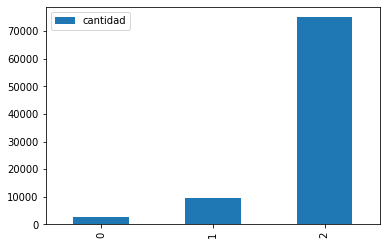

In [141]:
precio_bajo = (ds_clasificacion[ds_clasificacion["precioxm2"]<1000]).shape[0]
precio_medio = (ds_clasificacion[ds_clasificacion["precioxm2"]>=1000]).shape[0] - (ds_clasificacion[ds_clasificacion["precioxm2"]>=1500]).shape[0]
precio_alto = (ds_clasificacion[ds_clasificacion["precioxm2"]>=1500]).shape[0]

df_precios = pd.DataFrame(list(zip(["bajo","medio","alto"], [precio_bajo, precio_medio, precio_alto])), columns=["clasificacion", "cantidad"])
df_precios.plot.bar()

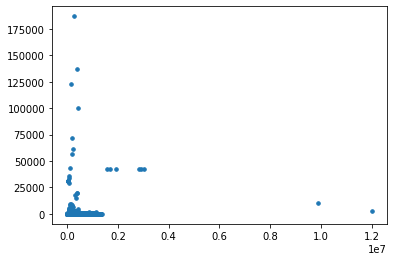

In [142]:
from sklearn.cluster import KMeans

#Generamos un dataset sintético
xy= ds_clasificacion[["property_price","property_surface_total"]]

plt.scatter(xy["property_price"], xy["property_surface_total"], s=50,marker='.')
plt.show()
kmeans = KMeans(n_clusters=3)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento

kmeans.fit(xy) #Entrenamos el algoritmo para que aprenda cómo agrupar

y_kmeans = kmeans.predict(xy)



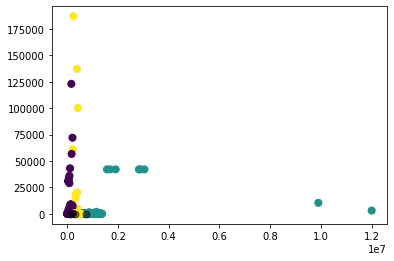

In [143]:
plt.scatter(xy["property_price"], xy["property_surface_total"], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,marker='.')
plt.show()

Viendo los resultados notamos que la clasificacion por clusters no es correspondiente a las anteriores clasificaciones ya que no es muy precisa al tomar en cuenta la superficie total

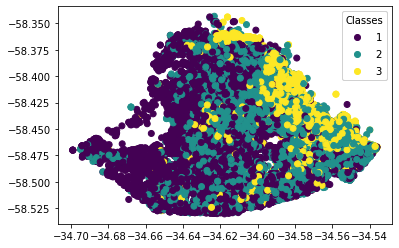

In [144]:
fig, ax = plt.subplots()
x=ds_clasificacion["latitud"]
y=ds_clasificacion["longitud"]
ds_clasificacion.loc[ds_clasificacion['precioxm2_q'] == "bajo",'color'] = 1
ds_clasificacion.loc[ds_clasificacion['precioxm2_q'] == "medio",'color'] = 2
ds_clasificacion.loc[ds_clasificacion['precioxm2_q'] == "alto",'color'] = 3

scatter = ax.scatter(x, y, c=ds_clasificacion['color'])
legend1 = ax.legend(*scatter.legend_elements(),
                     title="Classes")
ax.add_artist(legend1)
plt.show()

Como podemos observar, las viviendas de mayor valor se ubican en la zona este/norte de la ciudad, lo que es bastante coincidente a la realidad.

# **Entrenamiento y Predicción

Predeciccion del valor del atributo tipo_precio,

In [145]:
ds_clasificacion.isna().sum()

latitud                     0
longitud                    0
place_l3                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
precioxm2                   0
precioxm2_igual_frec        0
precioxm2_q                 0
precioxm2_relativo_q        0
color                       0
dtype: int64

In [146]:
#ds_clasificacion.drop()

In [147]:
ds_clasificacion.head(10)

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,precioxm2,precioxm2_igual_frec,precioxm2_q,precioxm2_relativo_q,color
0,-34.637319,-58.361124,Boca,Departamento,3.0,2.0,58.0,55.0,82900.0,1429.31,bajo,bajo,bajo,1.0
1,-34.628647,-58.361871,Boca,Departamento,4.0,3.0,70.0,70.0,99000.0,1414.29,bajo,bajo,bajo,1.0
2,-34.610027,-58.401934,Once,Departamento,4.0,2.0,134.0,104.0,146000.0,1089.55,bajo,bajo,bajo,1.0
3,-34.631621,-58.416825,Boedo,PH,4.0,2.0,107.0,73.0,250000.0,2336.45,medio,medio,alto,2.0
4,-34.623886,-58.412746,Boedo,PH,2.0,1.0,61.0,46.0,100000.0,1639.34,bajo,bajo,medio,1.0
5,-34.625588,-58.423056,Boedo,PH,4.0,2.0,104.0,54.0,185000.0,1778.85,bajo,medio,medio,2.0
6,-34.629398,-58.425852,Boedo,Departamento,2.0,1.0,62.0,44.0,100000.0,1612.90,bajo,bajo,bajo,1.0
7,-34.620748,-58.412004,Boedo,Departamento,3.0,2.0,59.0,55.0,185000.0,3135.59,alto,alto,alto,3.0
8,-34.626595,-58.420019,Boedo,PH,4.0,3.0,111.0,101.0,110000.0,990.99,bajo,bajo,bajo,1.0
9,-34.630538,-58.419221,Boedo,Departamento,3.0,2.0,50.0,50.0,95000.0,1900.00,bajo,medio,medio,2.0


In [148]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

In [149]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [150]:
#dropeamos los que no sirven

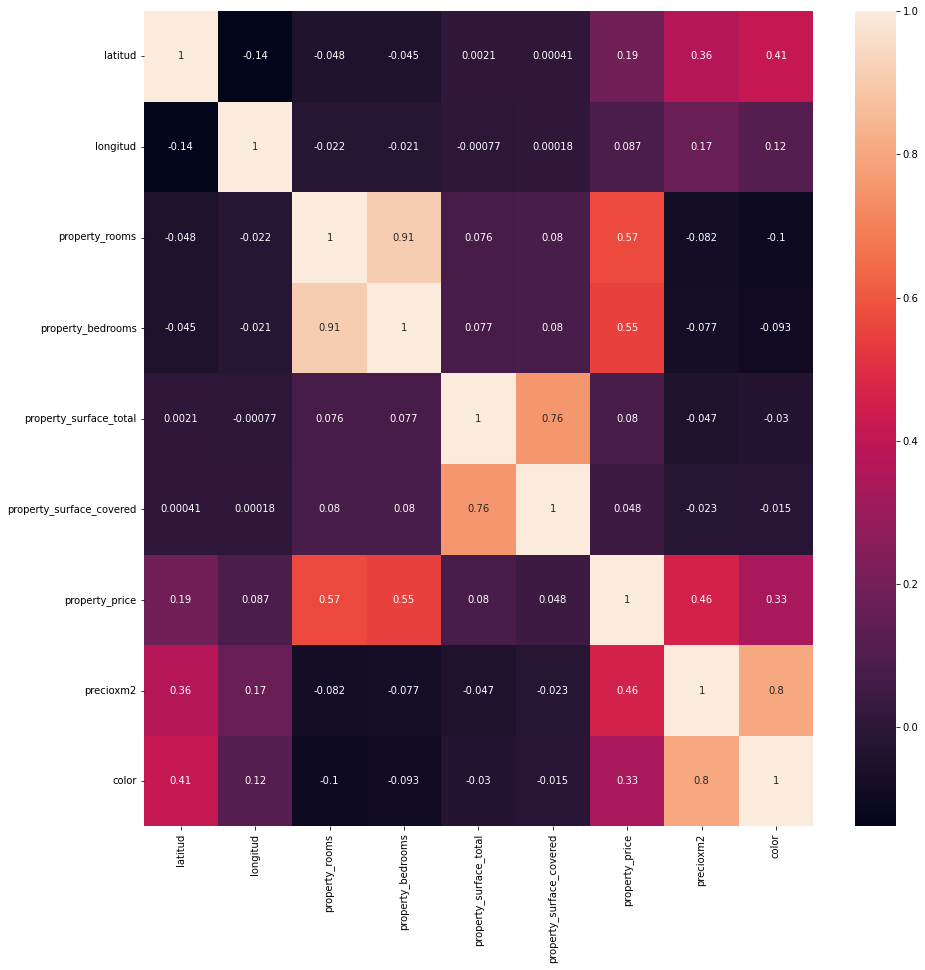

In [151]:
matriz_correlacion=ds_clasificacion.corr()

plt.figure(figsize=(15,15))
sns.heatmap(matriz_correlacion, annot = True)
plt.show()

In [152]:
features=['property_rooms','property_bedrooms','property_surface_total','property_surface_covered']
          
target='precioxm2_q'

In [153]:
#Verifico balanceo de clases
ds_clasificacion[target].value_counts(normalize=True)*100 #capaz tendriamos que tomar uno que este mas balanceado

medio    49.969551
bajo     25.039354
alto     24.991095
Name: precioxm2_q, dtype: float64

In [154]:
x_train, x_test, y_train, y_test = train_test_split(ds_clasificacion[features].values, 
                                                    ds_clasificacion[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=0,  #para poder reproducir el experimento
                                                    stratify=ds_clasificacion[target].values) #estratificado para mantener proporcion
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 69624
# Datos Prueba: 17407
% Positivos Entrenamiento: 25.039
% Positivos Prueba: 25.042


In [155]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer,f1_score

#Cantidad de combinaciones que quiero porbar
n=15 

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.05,n), 
               'max_depth':list(range(1,6))}
                
#Cantidad de splits para el Cross Validation
folds=10

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score, average='micro')

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n) 

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'ccp_alpha': array([0.        , 0.00357143, 0.00714286, 0.01071429, 0.01428571,
       0.01785714, 0.02142857, 0.025     , 0.02857143, 0.03214286,
       0.03571429, 0.03928571, 0.04285714, 0.04642857, 0.05      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5]},
                   scoring=make_scorer(f1_score, average=micro))

In [156]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'max_depth': 3, 'criterion': 'entropy', 'ccp_alpha': 0.0035714285714285718}
0.5281799871879941


In [157]:
randomcv.cv_results_['mean_test_score']

array([0.52655691, 0.49969838, 0.49969838, 0.49969838, 0.50099093,
       0.50099093, 0.49969838, 0.49969838, 0.52817999, 0.49969838,
       0.49969838, 0.49969838, 0.50099093, 0.49969838, 0.49969838])

In [158]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,features)):
  print('{}: {}'.format(feat,feat_imp))

property_bedrooms: 0.0
property_rooms: 0.0
property_surface_covered: 0.1859869848059335
property_surface_total: 0.8140130151940664


In [159]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol.fit(x_train,y_train)

reglas = export_text(arbol, feature_names=list(features))
print(reglas)

|--- property_surface_total <= 79.50
|   |--- property_surface_total <= 40.50
|   |   |--- class: medio
|   |--- property_surface_total >  40.50
|   |   |--- class: medio
|--- property_surface_total >  79.50
|   |--- property_surface_covered <= 67.50
|   |   |--- class: bajo
|   |--- property_surface_covered >  67.50
|   |   |--- property_surface_total <= 139.50
|   |   |   |--- class: medio
|   |   |--- property_surface_total >  139.50
|   |   |   |--- class: bajo



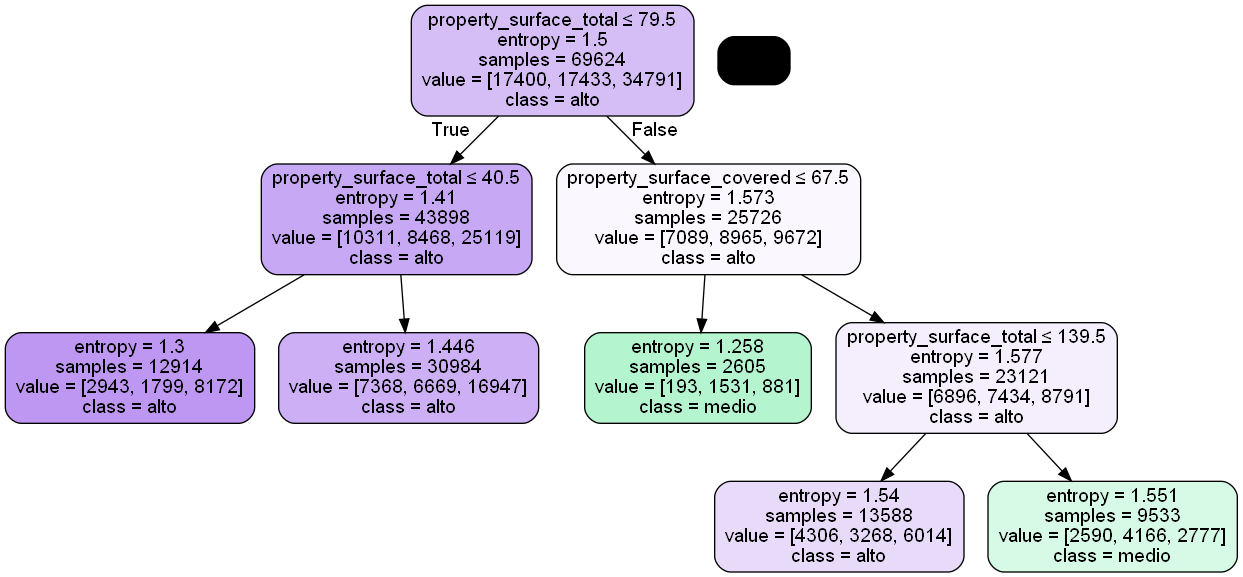

In [160]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=['bajo','medio','alto'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

***explicacion***

F1-Score: 0.5287528005974608


Text(33.0, 0.5, 'True')

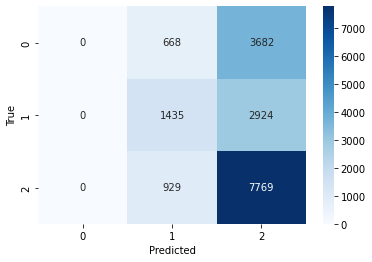

In [161]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= arbol.predict(x_test)

#Arbol Reporte y Matriz de Confusion
#print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='micro'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')